In [1]:
import numpy as np
import typing as tp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
import os
import time
import random

In [2]:
from BaselineSolver import BaselineSolver
from IterativeSolver import IterativeSolver
from GreedySolver import GreedySolver
from GradientDescentSolver import GradientDescentSolver
from utils import run_tests, read_tests_simplex_in_ball, run_random_test, read_tests_simplex_plus_ball_in_ball
from utils import read_tests_degenerate_simplex_in_ball, read_tests_polyhedron_in_ball, read_tests_simplex_in_ball_with_argmaxes

support_a, support_b = read_tests_simplex_in_ball_with_argmaxes(f'./tests/2d/simplex-in-ball/5', 2)
solver_instance = GradientDescentSolver(2, support_a, support_b, num_iterations=1000, learning_rate=0.5)
solver_instance.solve()

In [3]:
def plot_test_results(times: np.ndarray, t_errors: np.ndarray, title: str, colors: tp.Optional[np.ndarray] = None, fit=True, colorbar_name='delta') -> None:
    t_errors_without_zeros = np.copy(t_errors)
    t_errors_without_zeros[t_errors_without_zeros == 0.] = 1e-16
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    plt.xlabel('time, s')
    plt.ylabel('t_error')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    if colors is not None:
        plt.scatter(times, t_errors_without_zeros, c=colors, cmap='viridis_r', norm=LogNorm())
        plt.colorbar(label=colorbar_name)
    else:
        plt.scatter(times, t_errors_without_zeros)

    if fit:
        a, b = np.polyfit(np.log(times), np.log(t_errors_without_zeros), 1)
        plt.plot(times, np.exp(a * np.log(times) + b), 'r', label=f't_error ~ 1 / time^{-a:.2f}')
        plt.legend()
    plt.title(title)
    plt.savefig(f'figures/{title.replace(" ", "_").replace(",", "")}')

In [4]:
def get_gd_simplex_in_ball_results(dimension: int, silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b = read_tests_simplex_in_ball_with_argmaxes(f'./tests/{dimension}d/simplex-in-ball/{file}', dimension)
        solver_instance = GradientDescentSolver(dimension, support_a, support_b, num_iterations=1000, learning_rate=1)
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        if not silent:
            print(f'test {file}\t time {end_time - start_time}\t t_error {abs(1. - solver_instance.t)}\t num_restarts {solver_instance.restarts}')

    return np.array(times), np.array(t_errors)

test 1	 time 0.024553537368774414	 t_error 1.5234480343906398e-12	 num_restarts 0
test 10	 time 0.012830018997192383	 t_error 8.810729923425242e-13	 num_restarts 0
test 100	 time 0.012189388275146484	 t_error 5.39124300757976e-13	 num_restarts 0
test 11	 time 0.0539088249206543	 t_error 1.0144107776000055e-12	 num_restarts 1
test 12	 time 0.013253450393676758	 t_error 1.9813040097460544e-12	 num_restarts 0
test 13	 time 0.009388446807861328	 t_error 5.220268661787486e-13	 num_restarts 0
test 14	 time 0.06277942657470703	 t_error 1.3023915279575249e-11	 num_restarts 0
test 15	 time 0.014129638671875	 t_error 1.4872547637878597e-12	 num_restarts 0
test 16	 time 0.01883721351623535	 t_error 2.7686741788102154e-12	 num_restarts 0
test 17	 time 0.03394913673400879	 t_error 5.4115600889304005e-12	 num_restarts 0
test 18	 time 0.025159835815429688	 t_error 2.2918333897337106e-12	 num_restarts 0
test 19	 time 0.009814977645874023	 t_error 5.870859354217828e-13	 num_restarts 0
test 2	 time 0.02

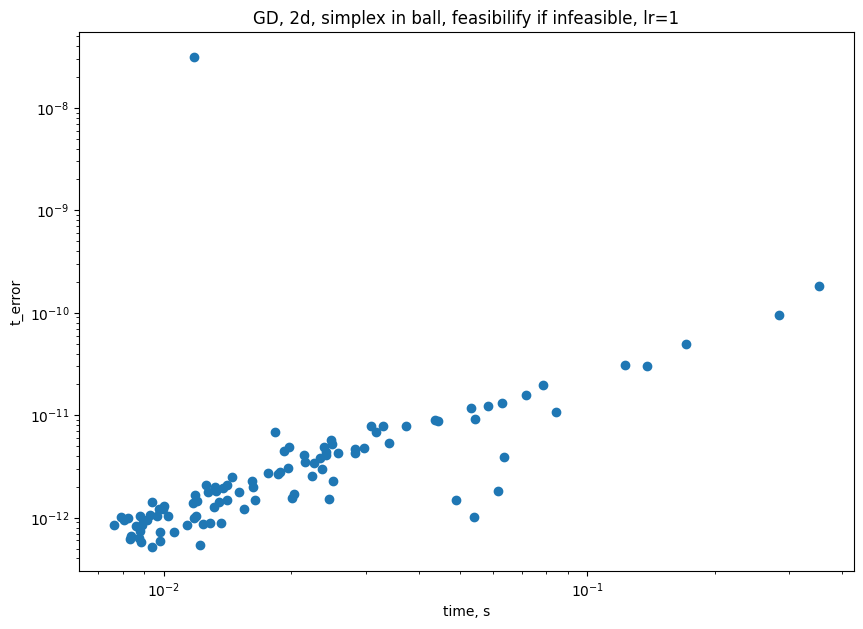

In [5]:
times_gd_2d, errors_gd_2d = get_gd_simplex_in_ball_results(2, silent=False)
plot_test_results(times_gd_2d, errors_gd_2d, 'GD, 2d, simplex in ball, feasibilify if infeasible, lr=1', fit=False)

test 1	 time 0.02947211265563965	 t_error 2.265410081747632e-12	 num_restarts 0
test 10	 time 0.044759273529052734	 t_error 7.5307537983349e-12	 num_restarts 0
test 100	 time 0.031497955322265625	 t_error 2.8967939158519584e-12	 num_restarts 0
test 11	 time 0.03248953819274902	 t_error 2.0174972803488345e-12	 num_restarts 0
test 12	 time 0.038375139236450195	 t_error 6.109668326814699e-12	 num_restarts 0
test 13	 time 0.02874159812927246	 t_error 3.178346474896898e-12	 num_restarts 0
test 14	 time 0.05367279052734375	 t_error 1.2266521132175967e-11	 num_restarts 0
test 15	 time 0.027192115783691406	 t_error 2.255973186038318e-12	 num_restarts 0
test 16	 time 0.046996116638183594	 t_error 7.30349114519413e-12	 num_restarts 0
test 17	 time 0.022288799285888672	 t_error 3.2589486664846845e-12	 num_restarts 0
test 18	 time 0.01829671859741211	 t_error 1.9083623570281816e-12	 num_restarts 0
test 19	 time 0.23611950874328613	 t_error 3.033717721478979e-11	 num_restarts 0
test 2	 time 0.91543

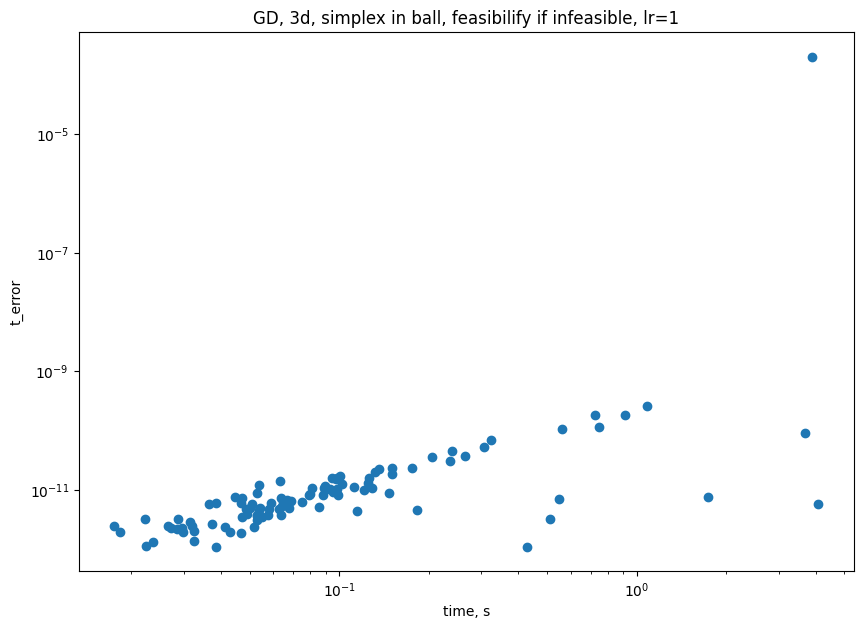

In [6]:
times_gd, errors_gd = get_gd_simplex_in_ball_results(3, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 3d, simplex in ball, feasibilify if infeasible, lr=1', fit=False)

test 1	 time 0.0953824520111084	 t_error 1.0167200414912259e-11	 num_restarts 0
test 10	 time 12.475255966186523	 t_error 0.014529664252610597	 num_restarts 2
test 100	 time 0.08497023582458496	 t_error 6.147193865047029e-12	 num_restarts 0
test 11	 time 0.04611611366271973	 t_error 4.00635080666234e-12	 num_restarts 0
test 12	 time 0.08725523948669434	 t_error 6.921241357815688e-12	 num_restarts 0
test 13	 time 0.17805123329162598	 t_error 8.61466453727644e-12	 num_restarts 0
test 14	 time 0.10138368606567383	 t_error 9.476530671292949e-12	 num_restarts 0
test 15	 time 0.07253503799438477	 t_error 2.792099884629806e-12	 num_restarts 0
test 16	 time 0.30223774909973145	 t_error 4.269817832636136e-11	 num_restarts 0
test 17	 time 0.580603837966919	 t_error 9.30533428089575e-12	 num_restarts 0
test 18	 time 0.07600116729736328	 t_error 1.0582867915331917e-11	 num_restarts 0
test 19	 time 0.06660723686218262	 t_error 8.937184325930048e-12	 num_restarts 0
test 2	 time 0.08880376815795898	 

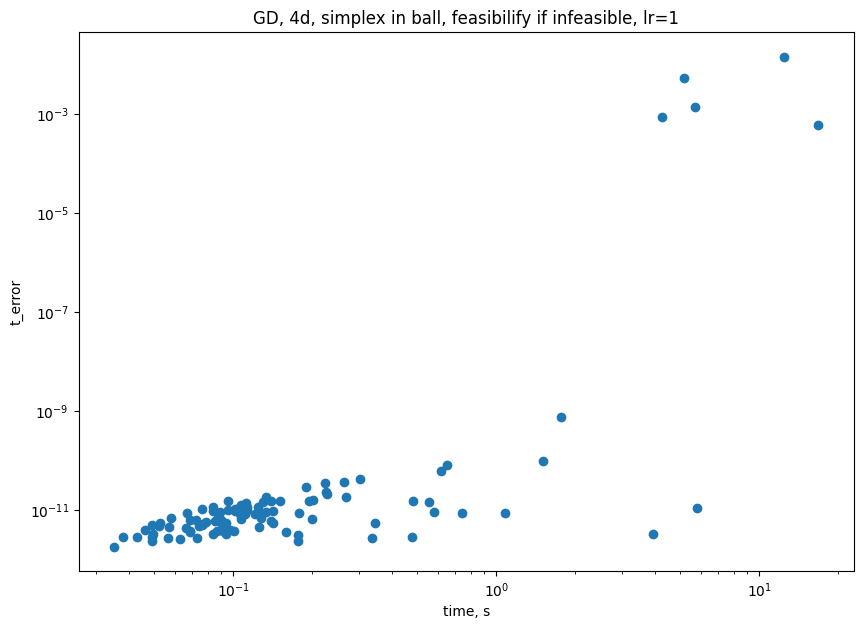

In [7]:
times_gd, errors_gd = get_gd_simplex_in_ball_results(4, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 4d, simplex in ball, feasibilify if infeasible, lr=1', fit=False)

test 1	 time 0.5146856307983398	 t_error 6.169031951941406e-11	 num_restarts 0
test 10	 time 0.19299650192260742	 t_error 2.2247759190463512e-11	 num_restarts 0
test 100	 time 0.06725311279296875	 t_error 4.519051799434237e-12	 num_restarts 0
test 11	 time 0.2197737693786621	 t_error 4.2006065292810035e-11	 num_restarts 0
test 12	 time 0.11835193634033203	 t_error 9.664713473966913e-12	 num_restarts 0
test 13	 time 0.3718855381011963	 t_error 2.338762516984616e-11	 num_restarts 0
test 14	 time 0.08768153190612793	 t_error 3.0937474804204612e-12	 num_restarts 0
test 15	 time 5.926404714584351	 t_error 7.933711716878733e-05	 num_restarts 0
test 16	 time 6.155828237533569	 t_error 3.287081717928686e-11	 num_restarts 1
test 17	 time 0.06204390525817871	 t_error 2.9203306439740118e-12	 num_restarts 0
test 18	 time 0.22814011573791504	 t_error 7.474132424079016e-12	 num_restarts 0
test 19	 time 0.9254953861236572	 t_error 1.59756763373764e-10	 num_restarts 0
test 2	 time 0.28163647651672363	

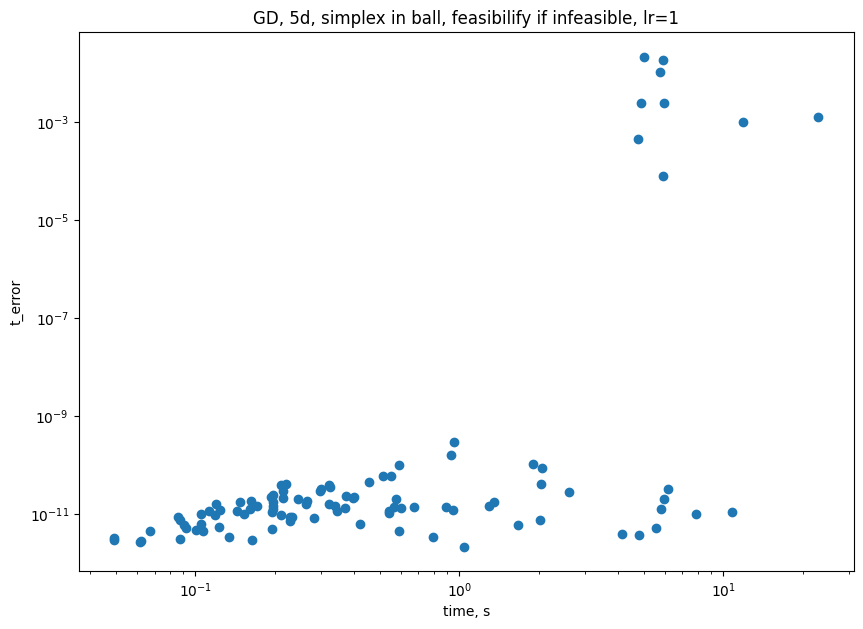

In [8]:
times_gd, errors_gd = get_gd_simplex_in_ball_results(5, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 5d, simplex in ball, feasibilify if infeasible, lr=1', fit=False)

In [9]:
%load_ext line_profiler

In [10]:
def get_baseline_test_results(dimension: int, number_tests: int, lowest_grid_density: float=100, highest_grid_density: float=10000,
                             silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for _ in range(number_tests):
        time, t_error = run_random_test(BaselineSolver, dimension, 
                                        {'grid_density': np.exp(np.random.uniform(np.log(lowest_grid_density), np.log(highest_grid_density)))}, 
                                        read_tests_simplex_in_ball, f'./tests/{dimension}d/simplex-in-ball/', silent=silent)
        times.append(time)
        t_errors.append(t_error)
    
    return np.array(times), np.array(t_errors)

In [11]:
def get_iterative_test_results(dimension: int, number_tests: int, lowest_cap_grid_diameter: int=3, 
                               highest_cap_grid_diameter: int=10,
                              silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for _ in range(number_tests):
        cap_grid_diameter = int(np.round(np.exp(np.random.uniform(np.log(lowest_cap_grid_diameter), np.log(highest_cap_grid_diameter)))))
        time, t_error = run_random_test(IterativeSolver, dimension, 
                                        {'cap_grid_diameter': cap_grid_diameter}, 
                                        read_tests_simplex_in_ball, f'./tests/{dimension}d/simplex-in-ball/', silent=silent)
        times.append(time)
        t_errors.append(t_error)
    
    return np.array(times), np.array(t_errors)

In [12]:
def get_greedy_simplex_in_ball_results(dimension: int, lowest_max_iteration: int=80, highest_max_iteration: int=80, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    deltas = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b, delta = read_tests_simplex_in_ball(f'./tests/{dimension}d/simplex-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        deltas.append(delta)
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(deltas)

In [13]:
def get_greedy_simplex_plus_ball_in_ball_results(dimension: int, lowest_max_iteration: int=100, highest_max_iteration: int=100, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    deltas = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b, delta = read_tests_simplex_plus_ball_in_ball(f'./tests/{dimension}d/simplex-plus-ball-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        deltas.append(delta)
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(deltas)

In [14]:
def get_greedy_degenerate_simplex_in_ball_results(dimension: int, lowest_max_iteration: int=100, highest_max_iteration: int=100, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b = read_tests_degenerate_simplex_in_ball(f'./tests/{dimension}d/degenerate-simplex-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors)

In [15]:
def get_greedy_polyhedron_in_ball_results(dimension: int, lowest_max_iteration: int=100, highest_max_iteration: int=100, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    d = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/polyhedron-in-ball/')):
        support_a, support_b, current_d = read_tests_polyhedron_in_ball(f'./tests/{dimension}d/polyhedron-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        d.append(current_d)
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(d)

file = random.choice(os.listdir('./tests/10d/simplex-in-ball/'))
support_a, support_b, delta = read_tests_simplex_in_ball(f'./tests/10d/simplex-in-ball/{file}', 10)
solver_instance = GreedySolver(10, support_a, support_b, num_iterations=500)

%prun solver_instance.solve()

times_greedy_2d, errors_greedy_2d, d_greedy_2d = get_greedy_polyhedron_in_ball_results(2, silent=True)
plot_test_results(times_greedy_2d, errors_greedy_2d, 'GreedySolver, 2d, polyhedron in ball', fit=False, colors=d_greedy_2d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_3d, errors_greedy_3d, d_greedy_3d = get_greedy_polyhedron_in_ball_results(3, silent=True) 
plot_test_results(times_greedy_3d, errors_greedy_3d, 'GreedySolver, 3d, polyhedron in ball', fit=False, colors=d_greedy_3d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_4d, errors_greedy_4d, d_greedy_4d = get_greedy_polyhedron_in_ball_results(4, silent=True) 
plot_test_results(times_greedy_4d, errors_greedy_4d, 'GreedySolver, 4d, polyhedron in ball', fit=False, colors=d_greedy_4d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_5d, errors_greedy_5d, d_greedy_5d = get_greedy_polyhedron_in_ball_results(5, silent=True) 
plot_test_results(times_greedy_5d, errors_greedy_5d, 'GreedySolver, 5d, polyhedron in ball', fit=False, colors=d_greedy_5d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_10d, errors_greedy_10d, d_greedy_10d = get_greedy_polyhedron_in_ball_results(10, silent=False) 
plot_test_results(times_greedy_10d, errors_greedy_10d, 'GreedySolver, 10d, polyhedron in ball', fit=False, colors=d_greedy_10d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_2d, errors_greedy_2d = get_greedy_degenerate_simplex_in_ball_results(2, silent=True)
plot_test_results(times_greedy_2d, errors_greedy_2d, 'GreedySolver, 2d, degenerate simplex', fit=False)

times_greedy_3d, errors_greedy_3d = get_greedy_degenerate_simplex_in_ball_results(3, silent=True)
plot_test_results(times_greedy_3d, errors_greedy_3d, 'GreedySolver, 3d, degenerate simplex', fit=False)

times_greedy_4d, errors_greedy_4d = get_greedy_degenerate_simplex_in_ball_results(4, silent=True)
plot_test_results(times_greedy_4d, errors_greedy_4d, 'GreedySolver, 4d, degenerate simplex', fit=False)

times_greedy_5d, errors_greedy_5d = get_greedy_degenerate_simplex_in_ball_results(5, silent=True)
plot_test_results(times_greedy_5d, errors_greedy_5d, 'GreedySolver, 5d, degenerate simplex', fit=False)

times_greedy_10d, errors_greedy_10d = get_greedy_degenerate_simplex_in_ball_results(10, silent=False)
plot_test_results(times_greedy_10d, errors_greedy_10d, 'GreedySolver, 10d, degenerate simplex', fit=False)

times_greedy_2d, errors_greedy_2d, deltas_greedy_2d = get_greedy_simplex_plus_ball_in_ball_results(2, silent=True)
plot_test_results(times_greedy_2d, errors_greedy_2d, deltas_greedy_2d, 'GreedySolver, 2d, simplex + ball, 50 iterations', fit=False)

times_greedy_3d, errors_greedy_3d, deltas_greedy_3d = get_greedy_simplex_plus_ball_in_ball_results(3, silent=True)
plot_test_results(times_greedy_3d, errors_greedy_3d, deltas_greedy_3d, 'GreedySolver, 3d, simplex + ball, 50 iterations', fit=False)

times_greedy_4d, errors_greedy_4d, deltas_greedy_4d = get_greedy_simplex_plus_ball_in_ball_results(4, silent=True)
plot_test_results(times_greedy_4d, errors_greedy_4d, deltas_greedy_4d, 'GreedySolver, 4d, simplex + ball, 50 iterations', fit=False)

times_greedy_5d, errors_greedy_5d, deltas_greedy_5d = get_greedy_simplex_plus_ball_in_ball_results(5, silent=True)
plot_test_results(times_greedy_5d, errors_greedy_5d, deltas_greedy_5d, 'GreedySolver, 5d, simplex + ball, 80 iterations', fit=False)

times_greedy_10d, errors_greedy_10d, deltas_greedy_10d = get_greedy_simplex_plus_ball_in_ball_results(10, silent=False)
plot_test_results(times_greedy_10d, errors_greedy_10d, deltas_greedy_10d, 'GreedySolver, 10d, simplex + ball, 100 iterations', fit=False)

times_greedy_2d, errors_greedy_2d, deltas_greedy_2d = get_greedy_test_results(2, silent=False)
plot_test_results(times_greedy_2d, errors_greedy_2d, deltas_greedy_2d, 'GreedySolver, 2d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_3d, errors_greedy_3d, deltas_greedy_3d = get_greedy_test_results(3, silent=False)
plot_test_results(times_greedy_3d, errors_greedy_3d, deltas_greedy_3d, 'GreedySolver, 3d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_4d, errors_greedy_4d, deltas_greedy_4d = get_greedy_test_results(4, silent=False)
plot_test_results(times_greedy_4d, errors_greedy_4d, deltas_greedy_4d, 'GreedySolver, 4d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_5d, errors_greedy_5d, deltas_greedy_5d = get_greedy_test_results(5, silent=False)
plot_test_results(times_greedy_5d, errors_greedy_5d, deltas_greedy_5d, 'GreedySolver, 5d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_10d, errors_greedy_10d, deltas_greedy_10d = get_greedy_test_results(10, silent=False)
plot_test_results(times_greedy_10d, errors_greedy_10d, deltas_greedy_10d, 'GreedySolver, 10d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_iterative_2d, errors_iterative_2d = get_iterative_test_results(2, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_2d, errors_iterative_2d, 'IterativeSolver, 2d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_iterative_3d, errors_iterative_3d = get_iterative_test_results(3, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_3d, errors_iterative_3d, 'IterativeSolver, 3d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_iterative_4d, errors_iterative_4d = get_iterative_test_results(4, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_4d, errors_iterative_4d, 'IterativeSolver, 4d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_iterative_5d, errors_iterative_5d = get_iterative_test_results(5, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_5d, errors_iterative_5d, 'IterativeSolver, 5d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_baseline_2d, errors_baseline_2d = get_baseline_test_results(2, 1000)

plot_test_results(times_baseline_2d, errors_baseline_2d, 'BaselineSolver, 2d, grid_from_cube, random inscribed simplex')

times_baseline_3d, errors_baseline_3d = get_baseline_test_results(3, 1000)

plot_test_results(times_baseline_3d, errors_baseline_3d, 'BaselineSolver, 3d, grid_from_cube, random inscribed simplex')

times_baseline_4d, errors_baseline_4d = get_baseline_test_results(4, 1000)

plot_test_results(times_baseline_4d, errors_baseline_4d, 'BaselineSolver, 4d, grid_from_cube, random inscribed simplex')

times_baseline_5d, errors_baseline_5d = get_baseline_test_results(5, 1000)

plot_test_results(times_baseline_5d, errors_baseline_5d, 'BaselineSolver, 5d, grid_from_cube, random inscribed simplex')